![title](header.png)

## Introduction

Sometimes data is stored online and is in a format that isn't so easy to convert to a file to download. Python has a number of packages that can read data from webpages, as well as some packages that can interact with APIs such as Google Finance to retrive data from the web. Here we will be looking at how to use modules pandas-datareader and beautiful soup to collect data from the web ready for analysis.

## Pandas-Datareader

Anaconda doesn't come with this module as default, but there are many ways to install this. The easiest is through the package manager in the Anaconda Navigator, but we can do it through the command prompt by passing the command: <code>conda install pandas-datareader</code>

After this we are ready to go!

Pandas-datareader lets us get data from a number of sources, including Google and Yahoo finance, and the World Bank, and import them into our workbook. Doing this is very simple:

First we need to import our modules as usual - here we are importing datetime as well so we can specify a time window of stock prices.

In [5]:
import pandas as pd
import pandas_datareader.data as web
import datetime

Then, we set our start and end dates:

In [6]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 1, 1)

Finally, we can import our data from Google Finance as follows:

In [7]:
teslaStock = web.DataReader("TSLA", 'google', start, end)

print(teslaStock.head())

             Open   High    Low  Close    Volume
Date                                            
2010-06-29  19.00  25.00  17.54  23.89  18783276
2010-06-30  25.79  30.42  23.30  23.83  17194394
2010-07-01  25.00  25.92  20.27  21.96   8229863
2010-07-02  23.00  23.10  18.71  19.20   5141807
2010-07-06  20.00  20.00  15.83  16.11   6879296


From here we can perform whatever analysis we want!

## Beautiful Soup

Sometimes our data doesn't play so nice - it might not be uploaded as a file pandas can read easily, or part of an API we can read with pandas-datareader. If all else fails, we can use Beautiful Soup to scrape the data straight from the web.

Beautiful Soup is an <b>extremely</b> complicated library - scraping the data is hard enough but after that you might need to clean it, i.e remove any useless values, before we can perform any analysis. We will look at a very simple example, getting a list of all the subreddits on the front page of reddit.

Before we start, you might need to install the BeautifulSoup packages using the Anaconda Navigator, or the command:

<code>conda install beautifulsoup4</code> 

or 

<code>pip install beautifulsoup4</code>

As always, we begin by importing our modules:

In [15]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt

Then we use the urlopen to import the webpage, and use beautifulsoup to parse it:

In [16]:
url = "http://www.reddit.com"

content = urlopen(url).read()

soup = BeautifulSoup(content, "lxml")

The variable "soup" is now jus the html code of the front page of reddit.

Next, we can use the .find_all method to give a list of elements on the webpage that have the "a" tag, which, in html, starts a hyperlink. Then we can use a for loop to print a list of all the links. To stop the output from getting crowded, we set up a loop to only give us the 20 outputs. For the purposes of this exercise, we're taking the outputs 60 to 80 to see some of the junk we'll get out:

In [40]:
counter = 0
for links in soup.find_all('a'):
    if counter < 80 and counter > 60:
        print(links.get('href'))
        counter += 1
    else:
        counter += 1

https://www.reddit.com/gilded/
https://www.reddit.com/wiki/
https://www.reddit.com/ads/
https://www.reddit.com/login
javascript:void(0)
https://www.reddit.com/wiki/search
https://www.reddit.com/wiki/search
/password
https://www.reddit.com/submit
https://www.reddit.com/submit?selftext=true
/gold?goldtype=code&source=progressbar
/gold/about
/r/goldbenefits
https://en.wikipedia.org/wiki/Pacific_Time_Zone
None
/newsletter
#
/r/GolemProject/?utm_content=trending_sr_4&utm_medium=trending_subreddits_bar&utm_source=reddit&utm_name=frontpage
/r/lockpicking/?utm_content=trending_sr_3&utm_medium=trending_subreddits_bar&utm_source=reddit&utm_name=frontpage


From here we can see that we have some useful outputs, and also some useless ones. We can start to clean this up for analysis. This is going to get extremely messy, and isn't efficient, but you should only have to clean up data once, so it doesn't matter that much!

We go through a similar procedure as before, but we only print the link if it starts with "https://www.reddit.com/r/" <b>and</b> stops after the subreddit. This is because we don't want to include links to particular posts, just the subreddits themselves. We also need to include a "try" and "except" clause to catch any errors that may come up because the code is messy. Again, for the sake of space, we've filtered a lot of the outputs out using a counter, but if you want you can remove the for loop to see the complete output:

In [41]:
counter = 0
for links in soup.find_all('a'):
    if counter < 80 and counter > 60:
        try:
            if links.get('href').split("/")[0:4] == ['https:', '', 'www.reddit.com', 'r'] and len(links.get('href').split("/")) == 6:
                print (links.get('href'))
                counter += 1
        except AttributeError:
            print(" ")
            
    else:
        counter += 1

 
https://www.reddit.com/r/funny/
https://www.reddit.com/r/ProgrammerHumor/
https://www.reddit.com/r/instant_regret/
https://www.reddit.com/r/gaming/
https://www.reddit.com/r/gifs/
https://www.reddit.com/r/Whatcouldgowrong/
https://www.reddit.com/r/oddlysatisfying/
https://www.reddit.com/r/movies/
https://www.reddit.com/r/technology/
https://www.reddit.com/r/aww/
https://www.reddit.com/r/worldnews/
https://www.reddit.com/r/PrequelMemes/
https://www.reddit.com/r/shittyrobots/
https://www.reddit.com/r/woahdude/
https://www.reddit.com/r/comics/
https://www.reddit.com/r/DIY/
https://www.reddit.com/r/HighQualityGifs/
https://www.reddit.com/r/hacking/
https://www.reddit.com/r/mildlyinteresting/


To finish cleaning up our data, we can alter our code again to get rid of the link and leave us with the subreddit name, and put all the names into a list:

In [42]:
subredditList = []
for links in soup.find_all('a'):
    try:
        if links.get('href').split("/")[0:4] == ['https:', '', 'www.reddit.com', 'r'] and len(links.get('href').split("/")) == 6:
            subredditList.append(links.get('href').split("/")[4])
    except AttributeError:
        print(" ")

Great! From here on it's plain sailing. Now let's take a look at our useful data, stored in the variable subredditList.

In [46]:
print(subredditList[0:21]) #only taking the first 20 subreddits: 

['popular', 'all', 'random', 'AskReddit', 'funny', 'worldnews', 'pics', 'gaming', 'todayilearned', 'news', 'gifs', 'aww', 'videos', 'movies', 'Showerthoughts', 'mildlyinteresting', 'Jokes', 'explainlikeimfive', 'LifeProTips', 'television', 'IAmA']


Now we can start to work with our data - first we need to count how many times each subreddit is mentioned:

In [47]:
counts = pd.Series(subredditList).value_counts() #Convert this to a pandas frame to work with
print(counts.head())

DIY                  2
gifs                 2
mildlyinteresting    2
funny                2
worldnews            2
dtype: int64


Then we can go ahead and graph this data using pandas in built barplot:

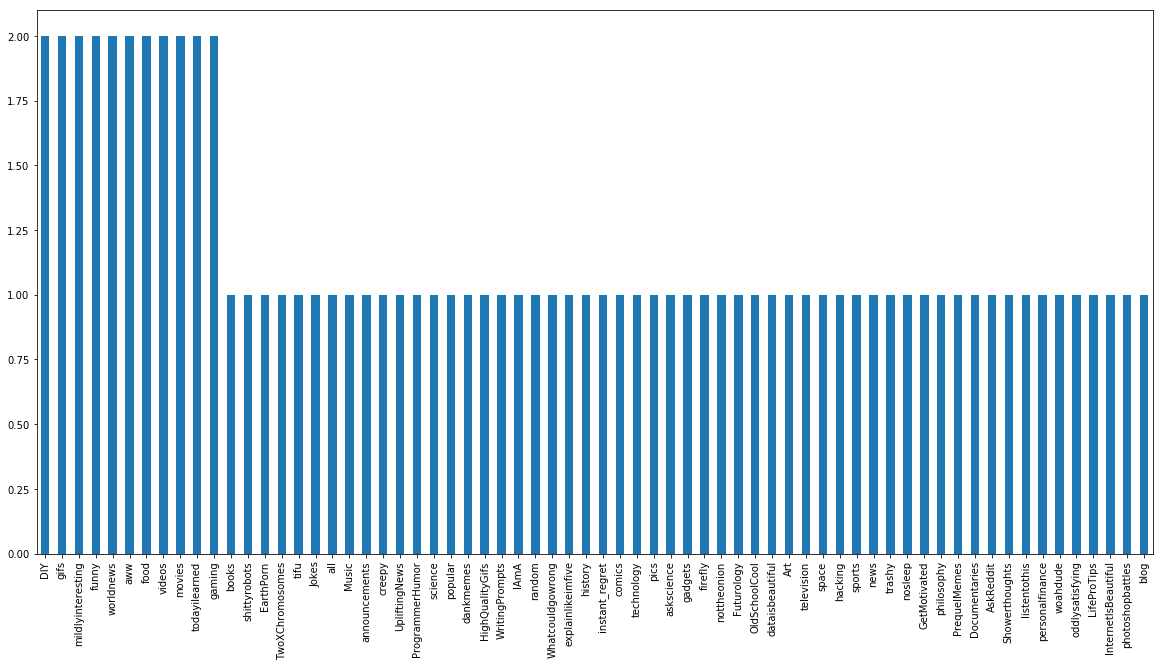

In [48]:
plt.figure(figsize=(20,10)) #Increase the figuresize for clarity
counts.plot.bar() #Plot the data
plt.show() #Show the plot

If you've made it this far - well done! This is used as a brute force, last resort method to get data, and is very hard to do well. If you've understood the power of web scraping, you've done well!

## Worked Example

We are going to create a function that will output a graph of any stock we input, over the time period of the last year. Here's the complete annotated code below.

In [49]:
# Import our modules:

import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime


# Start our function definition:

def stockPriceGraph(symbol):
    
    # Define the start and end date as Jan 1 2016 and Jan 1 2017
    
    start = datetime.datetime(2016, 1, 1)
    end = datetime.datetime(2017, 1, 1)
    
    # Get the data from the Google Finance API
    
    data = web.DataReader(symbol, 'google', start, end)
    
    # Plot and show the data
    
    plt.plot(data.index, data["Open"])
    plt.show()

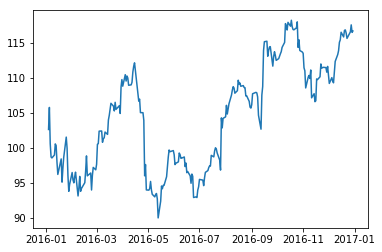

In [82]:
stockPriceGraph("AAPL")

Great! From here we could change the plot to make it look nicer, or perform further analysis of the data

## Mini Projects

By editing the code above, and looking at the pandas and matplotlib documentation, can you:

* Print the mean and variance of the stock along with the graph?

* Show the value of the mean as a line on the graph?

* Create a new column in the dataframe, that is a moving average of the stock price over the last 5 dates

* Graph this moving average on the stock graph

* Do the same thing with a moving average over 25 dates - do you notice anything when the two moving averages cross? (This is a form of techinical analysis stock traders use!)

## Resources and Further Reading

* https://www.crummy.com/software/BeautifulSoup/ - The documentation for Beautiful Soup
* http://pandas.pydata.org/pandas-docs/stable/ - Pandas documentation
* https://pandas-datareader.readthedocs.io/en/latest/ - Pandas datareader documentation